In [1]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [2]:
llm.invoke("hi").content

'Hi! 👋  How can I help you today? 😄\n'

In [3]:
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

In [4]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [5]:
workflow=StateGraph(MessagesState)
workflow.add_node("chatbot",call_model)
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot",END)
app=workflow.compile()

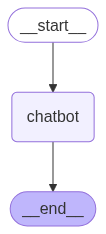

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
# class MessagesState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

In [8]:
input={"messages":["hi, my name is adi"]}

In [9]:
app.invoke(input)

{'messages': [HumanMessage(content='hi, my name is adi', additional_kwargs={}, response_metadata={}, id='a22cef57-371e-4ff6-bdd1-6cd99fcb60d6'),
  AIMessage(content="Hi Adi, it's nice to meet you! 👋\n\nWhat can I do for you today? 😊  \n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 15, 'total_tokens': 41, 'completion_time': 0.047272727, 'prompt_time': 0.001880414, 'queue_time': 0.261600375, 'total_time': 0.049153141}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--93e351b9-e8a7-4621-b3e9-f1c04df3b69f-0', usage_metadata={'input_tokens': 15, 'output_tokens': 26, 'total_tokens': 41})]}

In [10]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from chatbot Node
_______
{'messages': [AIMessage(content="Hi Adi, it's nice to meet you!\n\nWhat can I do for you today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 15, 'total_tokens': 39, 'completion_time': 0.043636364, 'prompt_time': 0.001883464, 'queue_time': 0.261283817, 'total_time': 0.045519828}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--3a653ea0-b444-4c46-8101-aa644fb0f852-0', usage_metadata={'input_tokens': 15, 'output_tokens': 24, 'total_tokens': 39})]}




In [4]:
@tool
def search(query: str):
    """this is my custom tool."""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "It's 60 degrees and foggy."
    return "It's 90 degrees and sunny."

In [12]:
search.invoke("what is a temprature in sf?")

"It's 60 degrees and foggy."

In [13]:
search.invoke("what is a weather in india?")

"It's 90 degrees and sunny."

In [14]:
search

StructuredTool(name='search', description='this is my custom tool.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001F3661AE3E0>)

In [5]:
tools=[search]

In [6]:
tool_node=ToolNode(tools)

In [7]:
llm_with_tool=llm.bind_tools(tools)

In [8]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm_with_tool.invoke(messages)
    return {"messages": [response]}

In [19]:
response=call_model({"messages": ["hi how are you?"]})

In [20]:
response

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'wph2eq8d2', 'function': {'arguments': '{"query":"hi how are you"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 940, 'total_tokens': 1021, 'completion_time': 0.147272727, 'prompt_time': 0.040520979, 'queue_time': 0.27327283199999997, 'total_time': 0.187793706}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--438d9ca3-65f2-47b2-ad81-567252a90d3b-0', tool_calls=[{'name': 'search', 'args': {'query': 'hi how are you'}, 'id': 'wph2eq8d2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 940, 'output_tokens': 81, 'total_tokens': 1021})]}

[AIMessage(content='I am doing well, thank you. How are you?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 941, 'total_tokens': 955, 'completion_time': 0.025454545, 'prompt_time': 0.030139486, 'queue_time': 0.0028640919999999986, 'total_time': 0.055594031}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-7176e5d9-307e-4644-93e2-99d358198179-0', usage_metadata={'input_tokens': 941, 'output_tokens': 14, 'total_tokens': 955})]

In [21]:
messages = response['messages']

In [22]:
last_message=messages[-1]

In [23]:
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'hi how are you'},
  'id': 'wph2eq8d2',
  'type': 'tool_call'}]

In [24]:
response=call_model({"messages": ["what is a weather in India?"]})

In [25]:
response

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'gcv0heg72', 'function': {'arguments': '{"query":"weather in India"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 942, 'total_tokens': 1023, 'completion_time': 0.147272727, 'prompt_time': 0.032826604, 'queue_time': 0.264138015, 'total_time': 0.180099331}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--86b5c259-7e22-4c24-9710-c9903d6c855a-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in India'}, 'id': 'gcv0heg72', 'type': 'tool_call'}], usage_metadata={'input_tokens': 942, 'output_tokens': 81, 'total_tokens': 1023})]}

[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5q56', 'function': {'arguments': '{"query":"weather in India"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 943, 'total_tokens': 1025, 'completion_time': 0.149090909, 'prompt_time': 0.031104902, 'queue_time': 0.003129146000000003, 'total_time': 0.180195811}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-35d08bfe-0844-4902-8d36-71630335dd9e-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in India'}, 'id': 'call_5q56', 'type': 'tool_call'}], usage_metadata={'input_tokens': 943, 'output_tokens': 82, 'total_tokens': 1025})]

In [26]:
messages = response['messages']

In [27]:
last_message=messages[-1]

In [28]:
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in India'},
  'id': 'gcv0heg72',
  'type': 'tool_call'}]

In [9]:
def router_function(state: MessagesState) -> Literal["tools", END]:
    #print(f"here is a state from should continue {state}")
    messages = state['messages']
    last_message = messages[-1]
    #print(f"here is a last message from should continue {last_message}")
    if last_message.tool_calls:
        return "tools"
    return END

In [10]:
# Define a new graph
workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")

workflow.add_conditional_edges("agent",router_function,{"tools": "tools", END: END})

app = workflow.compile()

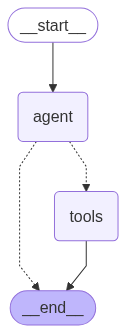

In [31]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
app.invoke({"messages": ["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='6cab81e6-6a7c-4c44-b779-795ca4b5eea4'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'mh4y8ngz7', 'function': {'arguments': '{"query":"hi how are you"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 940, 'total_tokens': 1023, 'completion_time': 0.150909091, 'prompt_time': 0.079326675, 'queue_time': 0.402377245, 'total_time': 0.230235766}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--9e366de4-42a5-4f0a-9d8e-6be6333b1e0c-0', tool_calls=[{'name': 'search', 'args': {'query': 'hi how are you'}, 'id': 'mh4y8ngz7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 940, 'output_tokens': 83, 'total_tokens': 1023}),
  ToolMessage(content="It's 90 degrees and sunny.", name='search', id='35371e18-bf40-4233-a220-9900664

In [33]:
app.invoke({"messages": ["what is the weather in sf"]})

{'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='ca56fe20-98b3-45b9-98fb-912dc24ac291'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '8takt2xdf', 'function': {'arguments': '{"query":"weather in sf"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 941, 'total_tokens': 1023, 'completion_time': 0.149090909, 'prompt_time': 0.0407888, 'queue_time': 0.26245732899999996, 'total_time': 0.189879709}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--25322c90-6609-4eef-af81-8bf9abb89b94-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': '8takt2xdf', 'type': 'tool_call'}], usage_metadata={'input_tokens': 941, 'output_tokens': 82, 'total_tokens': 1023}),
  ToolMessage(content="It's 60 degrees and foggy.", name='search', id='860c6079-fb23-4b1

In [34]:
workflow.add_edge("tools", 'agent')

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [35]:
app = workflow.compile()

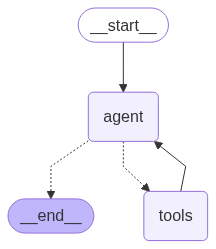

In [36]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [37]:
for output in app.stream({"messages": ["what is the weather in sf"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from agent
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'wvsbxtp96', 'function': {'arguments': '{"query":"weather in sf"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 941, 'total_tokens': 1023, 'completion_time': 0.149090909, 'prompt_time': 0.037375273, 'queue_time': 0.263389406, 'total_time': 0.186466182}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--804f45ec-d580-44f1-8b68-c7b9427c8a9a-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': 'wvsbxtp96', 'type': 'tool_call'}], usage_metadata={'input_tokens': 941, 'output_tokens': 82, 'total_tokens': 1023})]}


here is output from tools
_______
{'messages': [ToolMessage(content="It's 60 degrees and foggy.", name='search', id='63f33e26-f486-43c8-81de-e670e55ccb63', tool_call_id='wvsbxtp96')]}


here is out

In [11]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [12]:
# Define a new graph
workflow3 = StateGraph(MessagesState)

workflow3.add_node("agent", call_model)
workflow3.add_node("tools", tool_node)

workflow3.add_edge(START, "agent")

workflow3.add_conditional_edges("agent",router_function,{"tools": "tools", END: END})

workflow3.add_edge("tools", 'agent')

In [13]:
app3 = workflow3.compile(checkpointer = memory)

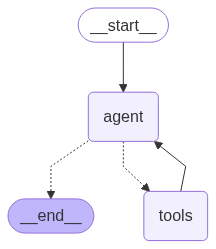

In [14]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [15]:
config = {"configurable": {"thread_id": "1"}}

In [20]:
events = app3.stream(
    {"messages": ["Hi there! My name is Adi."]}, config, stream_mode="values"
)

In [21]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Adi.
================================== Ai Message ==================================

Hi Adi! 👋  What can I do for you?


In [22]:
events = app3.stream(
    {"messages": ["can you tell me what was my name?"]}, config, stream_mode="values"
)

In [23]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

can you tell me what was my name?
================================== Ai Message ==================================

Your name is Adi.


In [24]:
memory.get(config)

{'v': 4,
 'ts': '2025-07-14T20:06:39.771201+00:00',
 'id': '1f060ee0-dc0d-6e91-800e-3a1a8a025dd2',
 'channel_versions': {'__start__': '00000000000000000000000000000015.0.6915023151931065',
  'messages': '00000000000000000000000000000016.0.0680762956334946',
  'branch:to:agent': '00000000000000000000000000000016.0.0680762956334946',
  'branch:to:tools': '00000000000000000000000000000006.0.7036170678412992'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000014.0.013373624061115308'},
  'agent': {'branch:to:agent': '00000000000000000000000000000015.0.6915023151931065'},
  'tools': {'branch:to:tools': '00000000000000000000000000000005.0.7720398574792229'}},
 'channel_values': {'messages': [HumanMessage(content='Hi there! My name is Sunny.', additional_kwargs={}, response_metadata={}, id='42943669-a13e-4b5b-863a-0ed991e132bb'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '84v427j10', 'function': {'arguments': '{"query":"Hi